In [1]:
import pandas as pd

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)

### Because the response variable is continous, this is a **regression** problem 

# Visualizing data using seaborn

**Seaborn** : Python library for statistical data visualization built on top of Matplotlib

In [5]:
#conventional way to import seaborn
import seaborn as sns

#allow plots to appear within the notebook
%matplotlib inline

/home/rabinson/Documents/DeepLearningwithPython/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


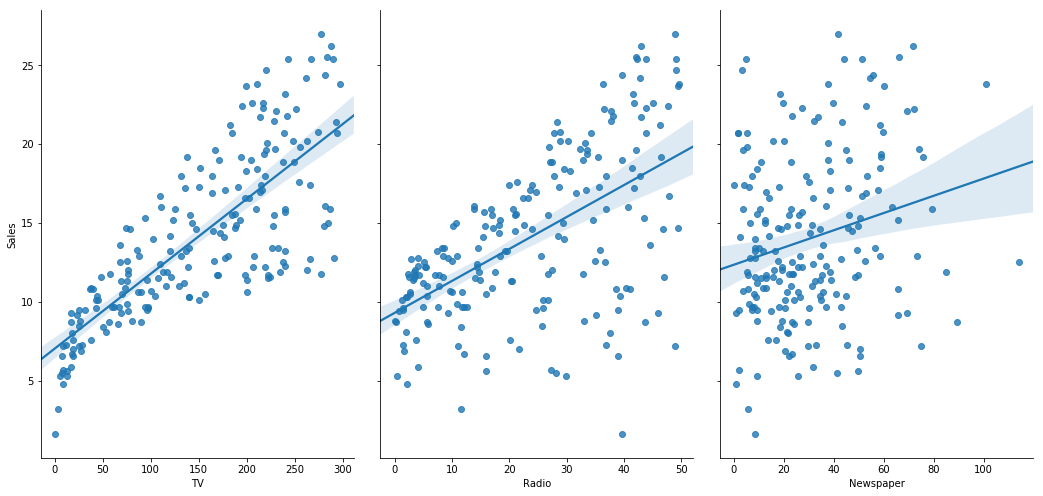

In [6]:
#visualize the relationship between the features and teh response using satterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'],y_vars = 'Sales',size = 7, aspect = 0.7, kind = 'reg')

## Linear Regression

#### Form of linear regression

y = beta0 + beta1 * x1 + beta2 * x2 + .... betan * xn

In this case:
    y = beta0 + beta1 * TV + beta2 * Radio             + beta 3 * Newspaper

In [7]:
#create a Python list of feature names
feature_cols = ['TV', 'Radio','Newspaper']

#use the list to select a subset of the orignial DataFrame
X = data[feature_cols]

#equivalent command to do this is one line
X = data[['TV', 'Radio','Newspaper']]

#print the fist 5 rows
X.head()          

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
#check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
#select a series from the DataFrame
y = data['Sales']

#equivalent command that works if there are no spaces in the column name
y = data.Sales

#print the fist 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
#check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


In [12]:
#default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Linear Regression model in scikit-learn


In [13]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data (learn the cofficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Interpreting model coefficients

In [14]:
#print the intercept and coeffficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [15]:
#pair the feature names with the coefficients 
res = zip(feature_cols, linreg.coef_)

In [16]:
for r in res:
    print(r)

('TV', 0.046564567874150295)
('Radio', 0.17915812245088839)
('Newspaper', 0.0034504647111804343)


- 𝑦=2.88+0.0466×𝑇𝑉+0.179×𝑅𝑎𝑑𝑖𝑜+0.00345×𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟

- How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:

This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales,  𝛽1  would be negative.

## Making predictions


In [17]:
#make predictions on the testin set
y_pred = linreg.predict(X_test)

## Model Evaluation metrics for regression


In [18]:
#define true and predicted response values
true = [ 100,50,30,20 ]
pred = [ 90, 50, 50, 30 ]

### Mean Absolute Error (MAE)

In [19]:
#calculate MEAN ABSOLUTE ERROR (MAE) by hand
print((10+0+20+10)/4)

#calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


### Mean Squared Error (MSE)

In [20]:
#Calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

#calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


### Root Mean Squared Error (RMSE)


In [21]:
#Calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 +0**2 + 20**2 + 10**2)/4))

#calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


### Computing the RMSE for our Sales prediction


In [22]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


### Feature Selection
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predicitons?
Lets remove it from the model and check RMSE

In [23]:
#create a Python list of feature names
feature_cols = ['TV','Radio']

#use the list to select a subset of the original DataFrame
X = data[feature_cols]

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#fit the model to the training data 
linreg.fit(X_train, y_train)

#make predictions on the testing set
y_pred = linreg.predict(X_test)

#compute the RMSE of our prediction
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


 ## Cross - Validation example: feature Selection
 - **Goal** : Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [25]:
#create a Python list of three feature names
feature_cols = ['TV','Radio','Newspaper']

#use the list to select subset of the DataFrame(X)
X = data[feature_cols]

#select the Sales column as the response (y)
y = data.Sales

In [30]:
from sklearn.model_selection import cross_val_score


#10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [31]:
#fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [33]:
#convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [34]:
#calculate the average RMSE
print(rmse_scores.mean())

1.6913531708051792


In [35]:
#10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV','Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error')).mean())

1.6796748419090766
